In [106]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
import cv2 as cv
from PIL import Image
from colorgrad import colorgrad

In [155]:
img1 = ski.io.imread('pic1.png')
img2 = ski.io.imread('pic2.png')

(<AxesSubplot:title={'center':'Y'}>,
 Text(0.5, 1.0, 'Y'),
 <matplotlib.colorbar.Colorbar at 0x217f39c1e40>)

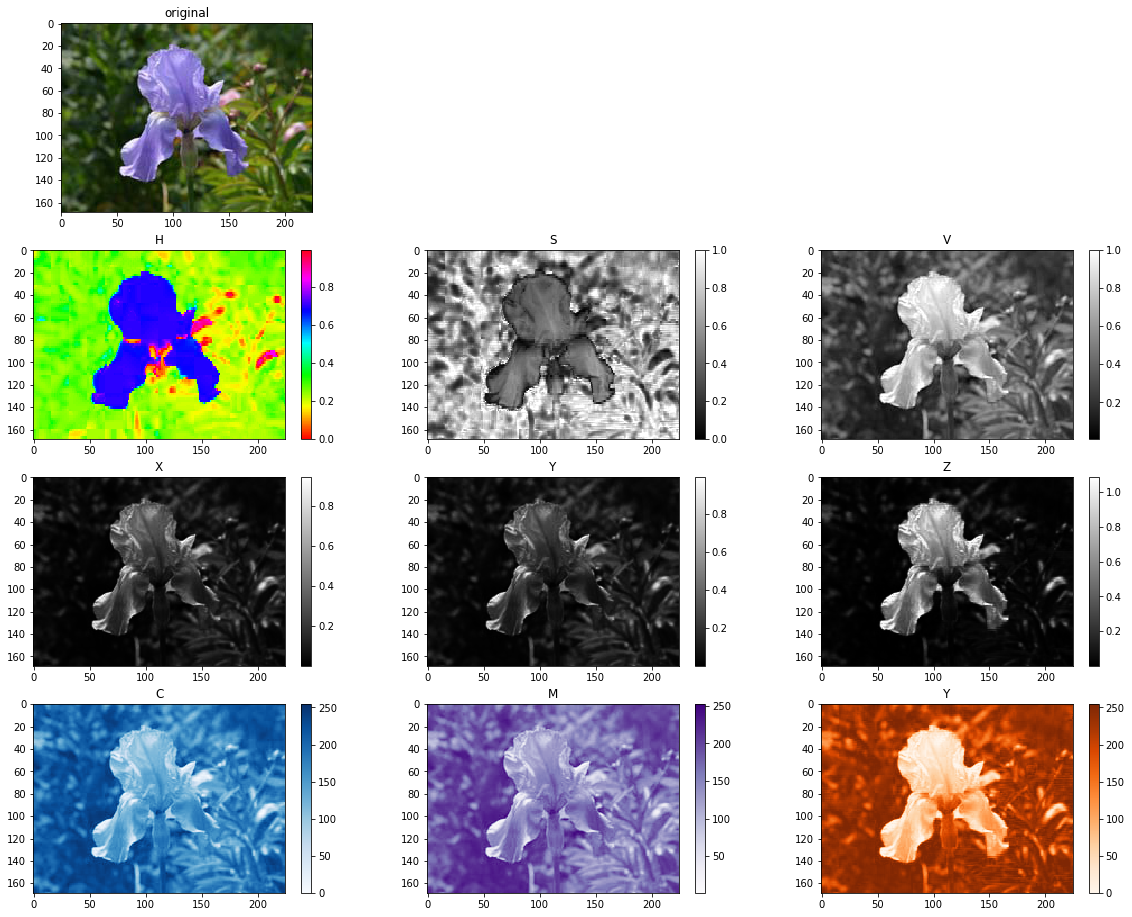

In [143]:
plt.figure(figsize=(20,16))

img1_pil = Image.fromarray(img1)
hsv = ski.color.convert_colorspace(img1, 'rgb', 'hsv')
xyz = ski.color.convert_colorspace(img1, 'rgb', 'xyz')
cmy = np.array(img1_pil.convert('CMYK'))

plt.subplot(431), plt.imshow(img1, interpolation='nearest', aspect='1'), plt.title('original')

plt.subplot(434), plt.imshow(hsv[:,:,0], interpolation='nearest', aspect='1', cmap='hsv'), plt.title('H'), plt.colorbar()
plt.subplot(435), plt.imshow(hsv[:,:,1], interpolation='nearest', aspect='1', cmap='gray'), plt.title('S'), plt.colorbar()
plt.subplot(436), plt.imshow(hsv[:,:,2], interpolation='nearest', aspect='1', cmap='gray'), plt.title('V'), plt.colorbar()

plt.subplot(437), plt.imshow(xyz[:,:,0], interpolation='nearest', aspect='1', cmap='gray'), plt.title('X'), plt.colorbar()
plt.subplot(438), plt.imshow(xyz[:,:,1], interpolation='nearest', aspect='1', cmap='gray'), plt.title('Y'), plt.colorbar()
plt.subplot(439), plt.imshow(xyz[:,:,2], interpolation='nearest', aspect='1', cmap='gray'), plt.title('Z'), plt.colorbar()

plt.subplot(4,3,10), plt.imshow(cmy[:,:,0], interpolation='nearest', aspect='1', cmap='Blues'), plt.title('C'), plt.colorbar()
plt.subplot(4,3,11), plt.imshow(cmy[:,:,1], interpolation='nearest', aspect='1', cmap='Purples'), plt.title('M'), plt.colorbar()
plt.subplot(4,3,12), plt.imshow(cmy[:,:,2], interpolation='nearest', aspect='1', cmap='Oranges'), plt.title('Y'), plt.colorbar()


(<AxesSubplot:title={'center':'original B'}>,
 Text(0.5, 1.0, 'original B'),
 <matplotlib.colorbar.Colorbar at 0x217f21083d0>)

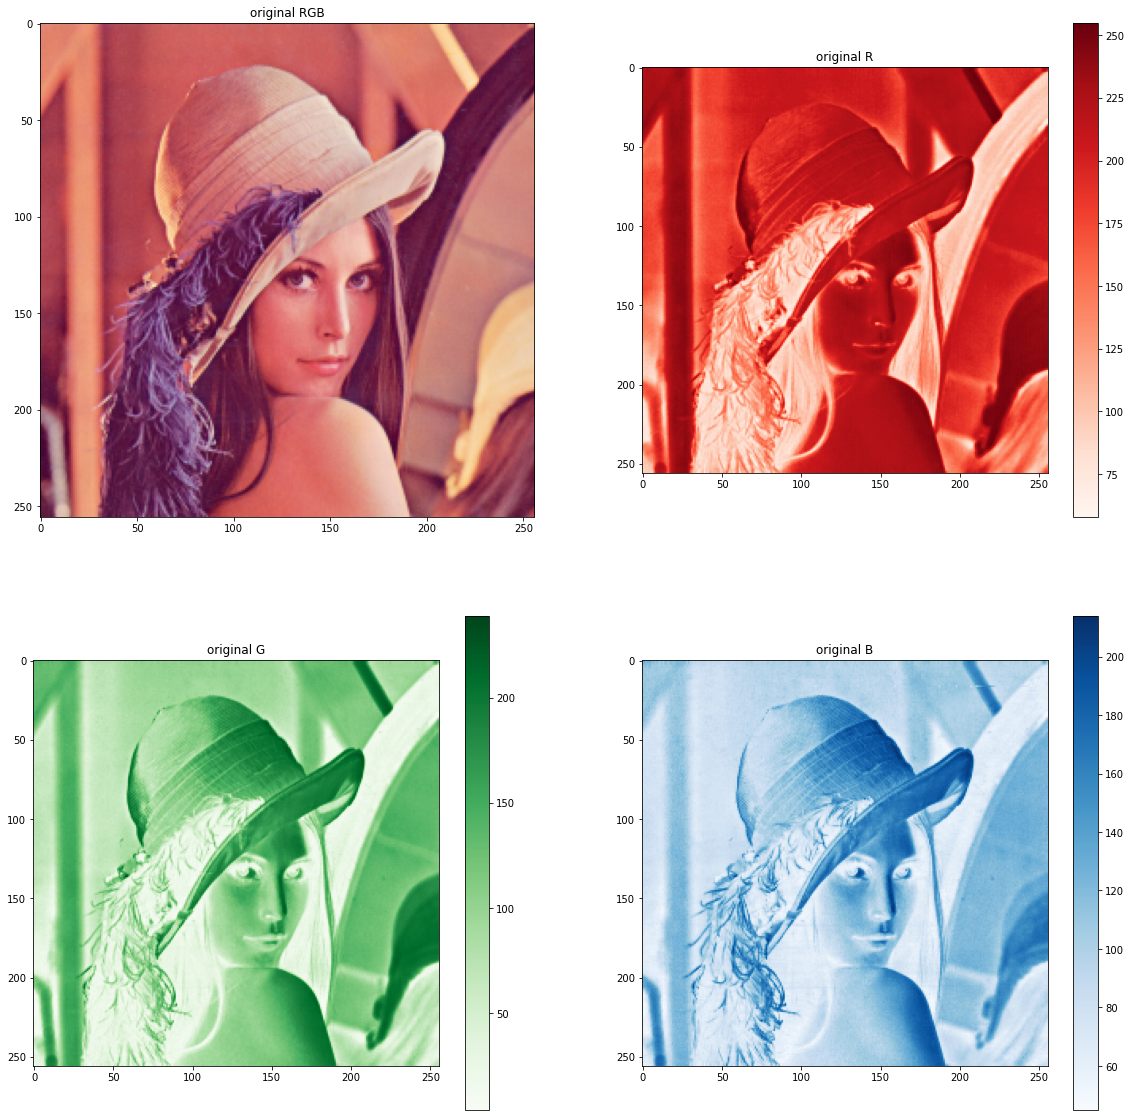

In [142]:
plt.figure(figsize=(20,20))
plt.subplot(221), plt.title("original RGB"), plt.imshow(img2)
plt.subplot(222), plt.title("original R"), plt.imshow(img2[:,:,0], cmap='Reds'), plt.colorbar()
plt.subplot(223), plt.title("original G"), plt.imshow(img2[:,:,1], cmap='Greens'), plt.colorbar()
plt.subplot(224), plt.title("original B"), plt.imshow(img2[:,:,2], cmap='Blues'), plt.colorbar()

(<AxesSubplot:title={'center':'V'}>,
 Text(0.5, 1.0, 'V'))

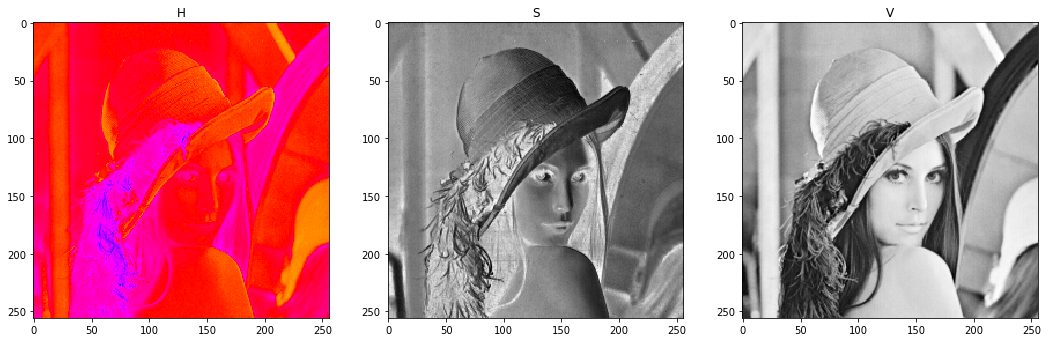

In [124]:
hsv2 = ski.color.convert_colorspace(img2, 'rgb', 'hsv')
plt.figure(figsize=(18,18))
plt.subplot(131), plt.imshow(hsv2[:,:,0], interpolation='nearest', aspect='1', cmap='hsv'), plt.title('H')
plt.subplot(132), plt.imshow(hsv2[:,:,1], interpolation='nearest', aspect='1', cmap='gray'), plt.title('S')
plt.subplot(133), plt.imshow(hsv2[:,:,2], interpolation='nearest', aspect='1', cmap='gray'), plt.title('V')

(<AxesSubplot:title={'center':'filtered in Lab (only L)'}>,
 Text(0.5, 1.0, 'filtered in Lab (only L)'),
 <matplotlib.image.AxesImage at 0x217f62e83d0>)

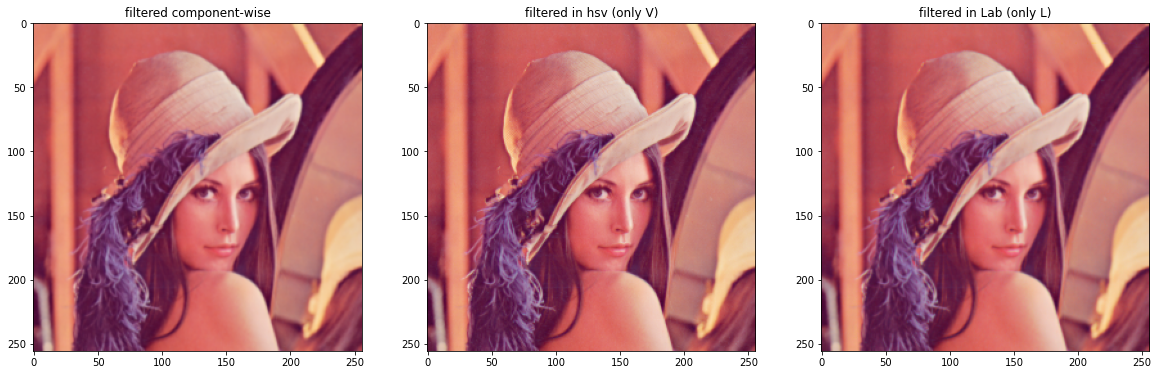

In [149]:
img2_1 = img2.copy()
img2_1[:,:,0] = ski.filters.gaussian(img2_1[:,:,0], 0.6, preserve_range=True)
img2_1[:,:,1] = ski.filters.gaussian(img2_1[:,:,1], 0.6, preserve_range=True)
img2_1[:,:,2] = ski.filters.gaussian(img2_1[:,:,2], 0.6, preserve_range=True)

plt.figure(figsize=(20,20))
plt.subplot(131), plt.title("filtered component-wise"), plt.imshow(img2_1)

###

img2_2 = ski.color.convert_colorspace(img2, 'rgb', 'hsv')
# img2_2[:,:,0] = ski.filters.gaussian(img2_2[:,:,0], 0.1, preserve_range=True)
# img2_2[:,:,1] = ski.filters.gaussian(img2_2[:,:,1], 0.6, preserve_range=True)
img2_2[:,:,2] = ski.filters.gaussian(img2_2[:,:,2], 0.6, preserve_range=True)
img2_2 = ski.color.convert_colorspace(img2_2, 'hsv', 'rgb')
plt.subplot(132), plt.title("filtered in hsv (only V)"), plt.imshow(img2_2)

#

img2_3 = ski.color.rgb2lab(img2)
img2_3[:,:,0] = ski.filters.gaussian(img2_3[:,:,0], 0.6, preserve_range=True)
# img2_3[:,:,1] = ski.filters.gaussian(img2_3[:,:,1], 0, preserve_range=True)
# img2_3[:,:,2] = ski.filters.gaussian(img2_3[:,:,2], 0, preserve_range=True)
img2_3 = ski.color.lab2rgb(img2_3)
plt.subplot(133), plt.title("filtered in Lab (only L)"), plt.imshow(img2_3)

(<matplotlib.image.AxesImage at 0x217f6ddd7e0>,
 Text(0.5, 1.0, 'after equalizeHist'))

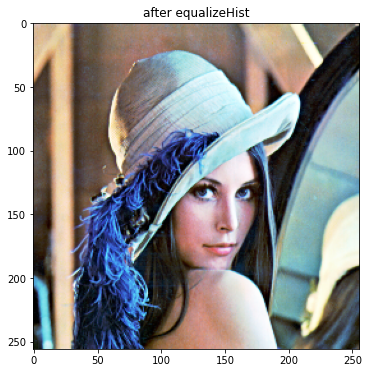

In [160]:
r,g,b = cv.split(img2)
r = cv.equalizeHist(r)
g = cv.equalizeHist(g)
b = cv.equalizeHist(b)

img2_equ = cv.merge((r, g, b))
plt.figure(figsize=(6,6))
plt.imshow(img2_equ), plt.title("after equalizeHist")

(<AxesSubplot:title={'center':'Gradient angle'}>,
 Text(0.5, 1.0, 'Gradient angle'),
 <matplotlib.colorbar.Colorbar at 0x217fe3fff70>)

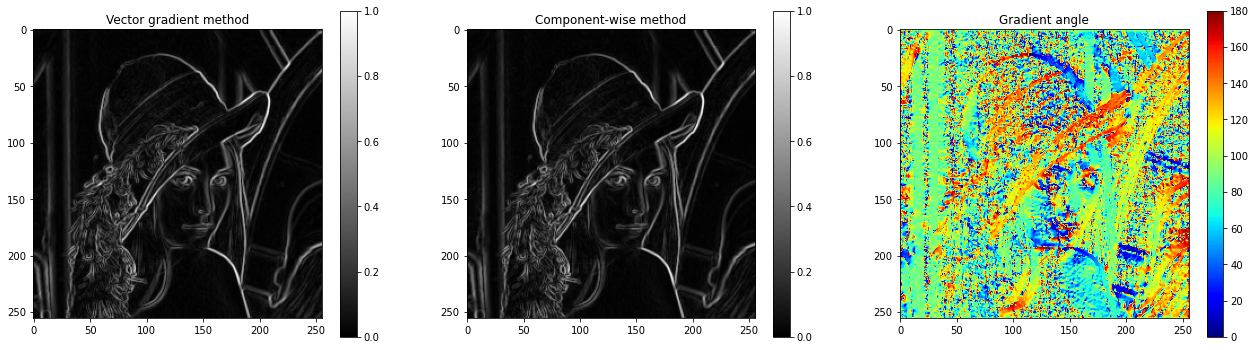

In [183]:
# Edge detection

VG, A, PPG = colorgrad(img2)

plt.figure(figsize=(22,6))
plt.subplot(131), plt.imshow(VG, cmap='gray'), plt.title('Vector gradient method'), plt.colorbar()
plt.subplot(132), plt.imshow(PPG, cmap='gray'), plt.title('Component-wise method'), plt.colorbar()
plt.subplot(133), plt.imshow(A * 180 / np.pi, cmap='jet'), plt.title('Gradient angle'), plt.colorbar()